<a href="https://colab.research.google.com/github/amitaucs/tensorflowexplore/blob/master/FashionClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [0]:
tf.__version__

# Load Dataset



In [0]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist-test.csv', sep = ',')

# Data Visualization

In [0]:
fashion_train_df.head()

In [0]:
fashion_test_df.tail()

In [0]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [0]:
training.shape

In [0]:
training

In [0]:
i = random.randint(1, 60000)
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') 

In [0]:
label = training[i,0]

In [0]:
label

In [0]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# Build and Train the model

In [0]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [0]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [0]:
X_train.shape

(60000, 784)

In [0]:
y_train.shape

(60000,)

In [0]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
from tensorflow.keras import datasets,layers,models
cnn = models.Sequential()
cnn.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D(2,2))

cnn.add(layers.Conv2D(64,(3,3), activation = 'relu'))
cnn.add(layers.MaxPool2D(2,2))

cnn.add(layers.Conv2D(64,(3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [0]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
epochs = 10
history = cnn.fit(X_train, y_train, batch_size= 512, epochs = epochs)

Epoch 1/10
60000/60000 [==============================] - 50s 839us/sample - loss: 0.2440 - accuracy: 0.9107
Epoch 2/10
60000/60000 [==============================] - 50s 839us/sample - loss: 0.2377 - accuracy: 0.9135
Epoch 3/10
60000/60000 [==============================] - 50s 830us/sample - loss: 0.2335 - accuracy: 0.9151
Epoch 4/10
60000/60000 [==============================] - 51s 844us/sample - loss: 0.2240 - accuracy: 0.9186
Epoch 5/10
60000/60000 [==============================] - 50s 834us/sample - loss: 0.2192 - accuracy: 0.9202
Epoch 6/10
60000/60000 [==============================] - 50s 827us/sample - loss: 0.2079 - accuracy: 0.9237
Epoch 7/10
60000/60000 [==============================] - 50s 825us/sample - loss: 0.2057 - accuracy: 0.9255
Epoch 8/10
60000/60000 [==============================] - 50s 841us/sample - loss: 0.1985 - accuracy: 0.9282
Epoch 9/10
60000/60000 [==============================] - 50s 832us/sample - loss: 0.1935 - accuracy: 0.9288
Epoch 10/10
60000/6

# Evaluate the model

In [0]:
evaluation = cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 321us/sample - loss: 0.2415 - accuracy: 0.9134


In [0]:
predicted_classes = cnn.predict_classes(X_test)

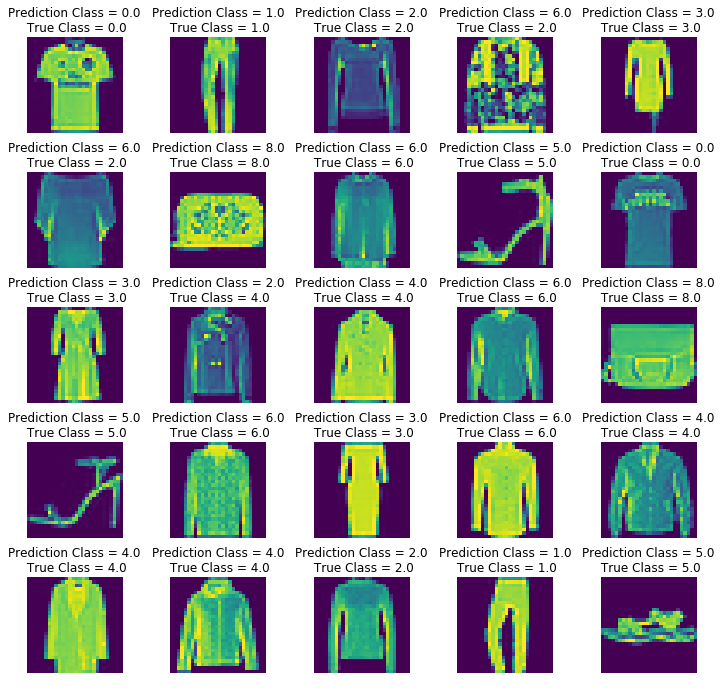

In [0]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

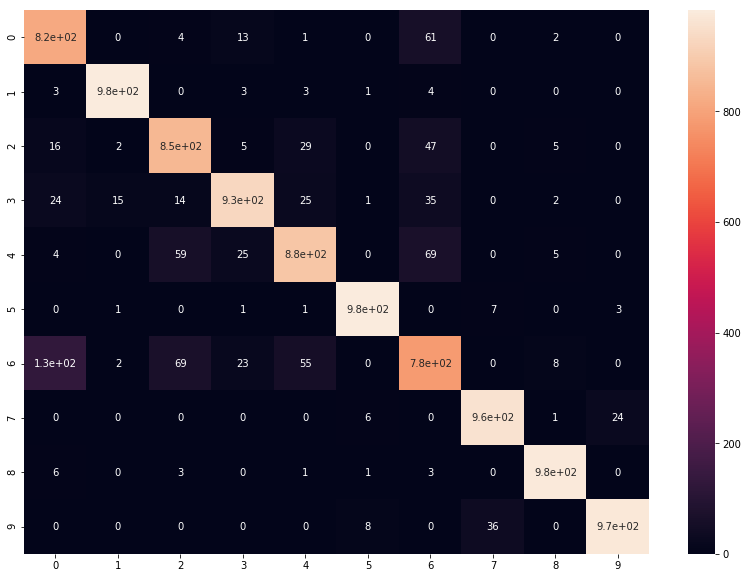

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( predicted_classes, y_test)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [0]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.82      0.86      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.85      0.87      1000
     Class 3       0.89      0.93      0.91      1000
     Class 4       0.85      0.89      0.86      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.73      0.78      0.76      1000
     Class 7       0.97      0.96      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

